In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Linear Regression Models and Least Squares

The linear regression model for predicting a real-valued output $ Y $ given an input vector $ X^T = (X_1, X_2, \dots, X_p) $ has the form:

$$
f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j
\tag{3.1}
$$

Where:
- $ \beta_j $ are unknown parameters or coefficients.
- $ X_j $ are variables, which could be:
  - Quantitative inputs,
  - Transformations of quantitative inputs (e.g., log, square-root),
  - Basis expansions (e.g., $ X_2 = X_1^2 $, $ X_3 = X_1^3 $, leading to a polynomial representation),
  - Numeric or dummy coding for qualitative inputs,
  - Interactions between variables (e.g., $ X_3 = X_1 \cdot X_2 $).

The model is linear in the parameters $ \beta_j $.

#### Least Squares Estimation

Given a set of training data \( (x_1, y_1), \dots, (x_N, y_N) \), the most popular method to estimate the parameters \( \beta \) is **least squares**, which minimizes the **residual sum of squares (RSS)**:

$$
\text{RSS}(\beta) = \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2 = \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2
\tag{3.2}
$$

This criterion is reasonable if the training observations $ (x_i, y_i) $ are independent random draws from the population.

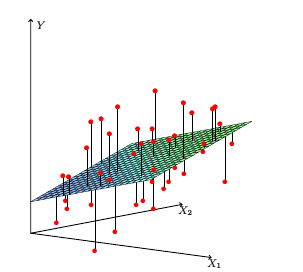

Figure 1. Linear least squares ﬁtting with X ∈ IR2 . We seek the linear function of X that minimizes the sum of squared residuals from Y .

The space occupied by the pairs \( (X, Y) \) is illustrated in a higher-dimensional plane. Equation (3.2) makes no assumptions about the validity of model (3.1); it simply finds the best linear fit to the data, measuring the average lack of fit.

To minimize equation (3.2), denote \( X \) as the \( N \times (p + 1) \) matrix, with each row as an input vector (with a 1 in the first position), and \( y \) as the \( N \)-vector of outputs. Then we can rewrite the residual sum-of-squares as:

$$
\text{RSS}(\beta) = (y - X\beta)^T (y - X\beta)
\tag{3.3}
$$

This is a quadratic function in the \( p + 1 \) parameters. Differentiating with respect to \( \beta \), we get:

$$
\frac{\partial \text{RSS}}{\partial \beta} = -2X^T (y - X\beta)
\tag{3.4a}
$$

$$
\frac{\partial^2 \text{RSS}}{\partial \beta \partial \beta^T} = 2X^T X
\tag{3.4b}
$$

Assuming that $ X $ has full column rank, and therefore $ X^T X $ is positive definite, setting the first derivative to zero yields:

$$
X^T (y - X\beta) = 0
\tag{3.5}
$$

Solving for $ \beta $ gives the unique least-squares solution:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
\tag{3.6}
$$

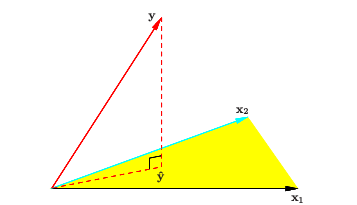
Figure 2. The N -dimensional geometry of least squares regression with two predictors. The outcome vector y is orthogonally projected onto the hyperplane spanned by the input vectors x1 and x2 . The projection ŷ represents the vector of the least squares predictions

The predicted values at an input vector $ x_0 $ are given by:

$$
\hat{f}(x_0) = (1 : x_0)^T \hat{\beta}
$$

The fitted values at the training inputs are:

$$
\hat{y} = X \hat{\beta} = X(X^T X)^{-1} X^T y
\tag{3.7}
$$

where $ \hat{y}_i = \hat{f}(x_i) $. The matrix $ H = X(X^T X)^{-1} X^T $, appearing in equation (3.7), is sometimes called the **hat matrix** because it "puts the hat on" $ y $. Figure 2 shows a geometrical representation of the least squares estimate in $ \mathbb{R}^N $. We denote the column vectors of $ X $ by $ x_0, x_1, \ldots, x_p $, with $ x_0 \equiv 1 $.

These vectors span a subspace of $ \mathbb{R}^N $, referred to as the column space of $ X $. To minimize $ \text{RSS}(\beta) = \| y - X \beta \|^2 $, we choose $ \hat{\beta} $ such that the residual vector $ y - \hat{y} $ is orthogonal to this subspace. This orthogonality is expressed in equation (3.5), and the resulting estimate $ \hat{y} $ is the orthogonal projection of $ y $ onto the subspace. The hat matrix $ H $ computes this orthogonal projection, hence it is also known as a **projection matrix**.

In some cases, the columns of $ X $ may not be linearly independent, meaning $ X $ is not of full rank. For example, if two inputs are perfectly correlated (e.g., $ x_2 = 3x_1 $), $ X^T X $ becomes singular, and the least squares coefficients $ \hat{\beta} $ are not uniquely defined. However, the fitted values $ \hat{y} = X \hat{\beta} $ are still the projection of $ y $ onto the column space of $ X $, but there are multiple ways to express this projection in terms of the columns of $ X $.

The non-full-rank case often occurs when qualitative inputs are coded redundantly. Usually, there is a natural way to resolve the non-unique representation, such as recoding and/or dropping redundant columns in $ X $. Most regression software automatically detects and handles these redundancies.


Rank deficiencies can arise in different scenarios, such as when the number of inputs $ p $ exceeds the number of training cases $ N $ in signal and image analysis. In these cases, the features are typically reduced by filtering or controlled by regularization.

Now, we make minimal assumptions about the true distribution of the data. To derive the sampling properties of $ \hat{\beta} $, we assume:
- The observations $ y_i $ are uncorrelated and have constant variance $ \sigma^2 $,
- The input vectors $ x_i $ are fixed (non-random).

The variance–covariance matrix of the least squares estimates $ \hat{\beta} $ is derived from equation (3.6) as:

$$
\text{Var}(\hat{\beta}) = (X^T X)^{-1} \sigma^2.
\tag{3.8}
$$

Typically, we estimate the variance \( \sigma^2 \) as:

$$
\sigma^2 = \frac{1}{N - p - 1} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2.
$$

The term $ N - p - 1 $ in the denominator ensures that $ \hat{\sigma}^2 $ is an unbiased estimate of $ \sigma^2 $, meaning $ E(\hat{\sigma}^2) = \sigma^2 $.

To draw inferences about the parameters $ \beta_j $ and the model, additional assumptions are needed. We assume that the linear model (equation 3.1) holds for the conditional expectation of $ Y $ given the inputs $ X_1, \ldots, X_p $, and that the deviations of $ Y $ from its expectation are additive and Gaussian. Hence, the model is:

$$
Y = \mathbb{E}(Y|X_1, \ldots, X_p) + \epsilon = \beta_0 + \sum_{j=1}^{p} X_j \beta_j + \epsilon,
\tag{3.9}
$$

where the error $ \epsilon \sim N(0, \sigma^2) $ is a Gaussian random variable with zero mean and variance $ \sigma^2 $.

Under the model assumptions in (3.9), it can be shown that the least squares estimate $ \hat{\beta} $ follows a multivariate normal distribution:

$$
\hat{\beta} \sim N(\beta, (X^T X)^{-1} \sigma^2).
\tag{3.10}
$$

This is a multivariate normal distribution with mean $ \beta $ and variance-covariance matrix $ (X^T X)^{-1} \sigma^2 $.

Furthermore, we know that:

$$
(N - p - 1)\hat{\sigma}^2 \sim \sigma^2 \chi^2_{N - p - 1},
\tag{3.11}
$$

which follows a chi-squared distribution with $ N - p - 1 $ degrees of freedom. Additionally, $ \hat{\beta} $ and $ \hat{\sigma}^2 $ are statistically independent, allowing us to use these distributional properties for hypothesis testing and constructing confidence intervals for the parameters $ \beta_j $.



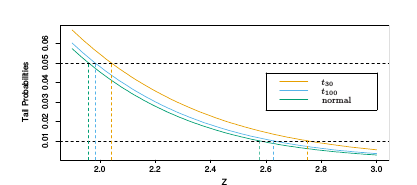

Figure 3. The tail probabilities Pr(|Z| > z) for three distributions, t30 , t100 and standard normal. Shown are the appropriate quantiles for testing signiﬁcance at the p = 0.05 and 0.01 levels. The diﬀerence between t and the standard normal becomes negligible for N bigger than about 100.

To test the hypothesis that a particular coefficient \( \beta_j = 0 \), we use the standardized coefficient or Z-score:

$$
z_j = \frac{\hat{\beta_j}}{\hat{\sigma} \sqrt{v_j}},
\tag{3.12}
$$

where $ v_j $ is the $ j $-th diagonal element of $ (X^T X)^{-1} $. Under the null hypothesis that $ \beta_j = 0 $, $ z_j $ follows a $ t $-distribution with $ N - p - 1 $ degrees of freedom. Therefore, a large (absolute) value of $ z_j $ will lead to the rejection of the null hypothesis. If $ \hat{\sigma} $ is replaced by a known value $ \sigma $, then $ z_j $ would follow a standard normal distribution. As the sample size increases, the difference between the tail quantiles of the $ t $-distribution and the standard normal distribution becomes negligible, and normal quantiles are typically used (see Figure 3).

### F-Statistic for Group Significance
When testing the significance of groups of coefficients, such as testing if a categorical variable with $ k $ levels can be excluded, we use the F-statistic:

$$
F = \frac{(RSS_0 - RSS_1)/(p_1 - p_0)}{RSS_1/(N - p_1 - 1)},
\tag{3.13}
$$

where:
- $ RSS_1 $ is the residual sum of squares for the larger model with $ p_1 + 1 $ parameters,
- $ RSS_0 $ is the same for the nested smaller model with $ p_0 + 1 $ parameters,
- $ p_1 - p_0 $ represents the number of additional parameters in the larger model.

The F-statistic measures the change in residual sum of squares per additional parameter in the bigger model, normalized by an estimate of $ \sigma^2 $. Under Gaussian assumptions and the null hypothesis that the smaller model is correct, the F-statistic follows an $ F_{p_1 - p_0, N - p_1 - 1} $-distribution. For large $ N $, the quantiles of $ F_{p_1 - p_0, N - p_1 - 1} $ approach those of a chi-squared distribution $ \chi^2_{p_1 - p_0}/(p_1 - p_0) $.

### Confidence Interval for $ \beta_j $
A $ 1 - 2\alpha $ confidence interval for $ \beta_j $ can be obtained from (3.10) as:

$$
\left( \hat{\beta_j} - z_{(1-\alpha)} \sqrt{v_j} \hat{\sigma}, \hat{\beta_j} + z_{(1-\alpha)} \sqrt{v_j} \hat{\sigma} \right),
\tag{3.14}
$$

where $ z_{(1-\alpha)} $ is the $ 1 - \alpha $-percentile of the normal distribution:
- $ z_{(1-0.025)} = 1.96 $,
- $ z_{(1-0.05)} = 1.645 $, etc.

The standard practice of reporting $ \hat{\beta_j} \pm 2 \cdot se(\hat{\beta_j}) $ results in an approximate 95% confidence interval. Even if the Gaussian error assumption does not hold, this interval will be approximately correct, with its coverage approaching \( 1 - 2\alpha \) as the sample size \( N \to \infty \).

### Confidence Set for the Parameter Vector \( \beta \)
Similarly, we can obtain an approximate confidence set for the entire parameter vector \( \beta \):

$$
C_{\beta} = \left\{ \beta \mid (\hat{\beta} - \beta)^T X^T X (\hat{\beta} - \beta) \leq \hat{\sigma}^2 \chi^2_{p+1, (1-\alpha)} \right\},
\tag{3.15}
$$

where $ \chi^2_{(1-\alpha)} $ is the $ 1 - \alpha $-percentile of the chi-squared distribution on $ l $ degrees of freedom. For example:
- $ \chi^2_{5, (1-0.05)} = 11.1 $,
- $ \chi^2_{5, (1-0.1)} = 9.2 $.

This confidence set for $ \beta $ generates a corresponding confidence set for the true function $ f(x) = x^T \beta $:

$$
\{x^T \beta \mid \beta \in C_{\beta} \}.
$$


In [1]:
# Function to compute the transpose of a matrix
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Function to multiply two matrices
def matrix_multiply(A, B):
    # Get dimensions
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    
    # Ensure the matrices are compatible for multiplication
    assert cols_A == rows_B, "Incompatible dimensions for matrix multiplication."
    
    # Resultant matrix (rows_A x cols_B)
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    
    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(cols_A))
    
    return result

# Function to calculate the inverse of a matrix (using Gauss-Jordan elimination)
def inverse(matrix):
    n = len(matrix)
    augmented_matrix = [row + [float(i == j) for i in range(n)] for j, row in enumerate(matrix)]
    
    # Perform Gauss-Jordan elimination
    for i in range(n):
        # Make the diagonal element 1
        factor = augmented_matrix[i][i]
        for j in range(2*n):
            augmented_matrix[i][j] /= factor
        
        # Make the other elements in the column 0
        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2*n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]
    
    # Extract the inverse matrix
    inverse_matrix = [row[n:] for row in augmented_matrix]
    return inverse_matrix

# Linear Regression class
class LinearRegression:
    def __init__(self):
        self.beta = None

    # Fit the model
    def fit(self, X, y):
        # Add the intercept term (column of ones) to X
        X_with_intercept = [[1] + row for row in X]
        
        # Transpose of X
        X_transposed = transpose(X_with_intercept)
        
        # Normal equation: (X^T X)^(-1) X^T y
        XTX = matrix_multiply(X_transposed, X_with_intercept)
        XTX_inv = inverse(XTX)
        XTy = matrix_multiply(X_transposed, y)
        
        # Coefficients (beta) = (X^T X)^(-1) X^T y
        self.beta = matrix_multiply(XTX_inv, XTy)
    
    # Predict new data
    def predict(self, X):
        # Add the intercept term (column of ones) to X
        X_with_intercept = [[1] + row for row in X]
        
        # Predicted values: y = X * beta
        return matrix_multiply(X_with_intercept, self.beta)

# Example usage
if __name__ == "__main__":
    # Training data (X) and labels (y)
    X = [
        [1, 2],  # Features for sample 1
        [2, 3],  # Features for sample 2
        [4, 5],  # Features for sample 3
        [3, 6]   # Features for sample 4
    ]
    y = [
        [10],  # Label for sample 1
        [14],  # Label for sample 2
        [28],  # Label for sample 3
        [20]   # Label for sample 4
    ]
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for new inputs
    predictions = model.predict([[3, 5], [5, 7]])
    print("Predictions:", predictions)


Predictions: [[20.714285714285708], [33.000000000000014]]


## Steps
## Matrix Operations: 
We manually implement matrix multiplication, transposition, and inversion using basic Python operations.
## LinearRegression Class:
fit(X, y): Fits the linear model by computing the coefficient vector $\betaβ$ using the normal equation.
predict(X): Predicts the output for new input data by multiplying the input matrix $XX$ with the computed $\betaβ$ vector.

## Example: 
The example demonstrates the model being trained on a simple dataset and predicting new values.


# Linear Regression Implementation using Normal Equation

### 1. Matrix Transpose :
The transpose of a matrix $ A $, denoted as $ A^T $, is computed by swapping rows and columns:
$$
A^T[i][j] = A[j][i]
$$

### 2. Matrix Multiplication :
Matrix multiplication is required for:

- $ X^T X $
- $ X^T y $
- $ X \beta $ (for predictions)

For matrices $ A \in \mathbb{R}^{m \times n} $ and $ B \in \mathbb{R}^{n \times p} $, the resulting matrix $ C \in \mathbb{R}^{m \times p} $ is computed as:
$$
C[i][j] = \sum_{k=1}^{n} A[i][k] \cdot B[k][j]
$$

### 3. Matrix Inversion :
To compute the coefficients $ \beta $, we need the inverse of the matrix $ X^T X $. The inverse of a matrix $ A $ satisfies:
$$
A A^{-1} = A^{-1} A = I
$$

Using **Gauss-Jordan Elimination**, we compute the inverse by augmenting \( A \) with the identity matrix and applying row operations.

### 4. Linear Regression Class :

#### **Fit Method**:
The **Normal Equation** is used to compute the optimal coefficients \( \beta \):
$$
\beta = (X^T X)^{-1} X^T y
$$

Where:
- \( X \) is the input feature matrix.
- \( y \) is the output target vector.
- \( (X^T X)^{-1} \) is the inverse of \( X^T X \).

#### **Predict Method**:
To make predictions with the learned coefficients \( \beta \):
$$
\hat{y} = X_{\text{new}} \beta
$$
Where \( \hat{y} \) are the predicted values and \( X_{\text{new}} \) are the new inputs.

### Summary of Key Equations:

- **Normal Equation**:
$$
\beta = (X^T X)^{-1} X^T y
$$

- **Prediction Equation**:
$$
\hat{y} = X_{\text{new}} \beta
$$


In [3]:
# Function to compute the transpose of a matrix
def transpose(matrix):
    """Transpose a given matrix (swap rows and columns)."""
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Function to multiply two matrices
def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    
    # Ensure the number of columns in A equals the number of rows in B
    assert cols_A == rows_B, "Incompatible dimensions for matrix multiplication."
    
    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    
    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(cols_A))
    
    return result

# Function to calculate the inverse of a matrix using Gauss-Jordan elimination
def inverse(matrix):
    """Calculate the inverse of a square matrix using Gauss-Jordan elimination."""
    n = len(matrix)
    
    # Create an augmented matrix [matrix | identity matrix]
    augmented_matrix = [row + [float(i == j) for i in range(n)] for j, row in enumerate(matrix)]
    
    # Perform Gauss-Jordan elimination
    for i in range(n):
        # Make the diagonal element 1
        factor = augmented_matrix[i][i]
        for j in range(2 * n):
            augmented_matrix[i][j] /= factor
        
        # Make the other elements in the column 0
        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]
    
    # Extract the inverse matrix from the augmented matrix
    inverse_matrix = [row[n:] for row in augmented_matrix]
    return inverse_matrix

# Linear Regression class
class LinearRegression:
    def __init__(self):
        self.beta = None  # The coefficients (including intercept)

    def fit(self, X, y):
        """
        Fit the model using the Normal Equation: beta = (X^T X)^(-1) X^T y
        
        X: Input feature matrix (without the intercept column)
        y: Output target vector
        """
        # Add the intercept term (column of ones) to X
        X_with_intercept = [[1] + row for row in X]
        
        # Transpose of X
        X_transposed = transpose(X_with_intercept)
        
        # Compute X^T * X
        XTX = matrix_multiply(X_transposed, X_with_intercept)
        
        # Compute (X^T * X)^(-1)
        XTX_inv = inverse(XTX)
        
        # Compute X^T * y
        XTy = matrix_multiply(X_transposed, y)
        
        # Calculate coefficients beta = (X^T X)^(-1) X^T y
        self.beta = matrix_multiply(XTX_inv, XTy)

    def predict(self, X):
        """
        Predict using the linear model: y = X * beta
        
        X: Input feature matrix (without the intercept column)
        """
        # Add the intercept term (column of ones) to X
        X_with_intercept = [[1] + row for row in X]
        
        # Predicted values: y = X * beta
        return matrix_multiply(X_with_intercept, self.beta)

# Example usage
if __name__ == "__main__":
    # Training data (X) and labels (y)
    X = [
        [1, 2],  # Features for sample 1
        [2, 3],  # Features for sample 2
        [4, 5],  # Features for sample 3
        [3, 6]   # Features for sample 4
    ]
    y = [
        [10],  # Label for sample 1
        [14],  # Label for sample 2
        [28],  # Label for sample 3
        [20]   # Label for sample 4
    ]
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for new inputs
    predictions = model.predict([[3, 5], [5, 7]])
    
    # Print the predictions
    print("Predictions:", predictions)


Predictions: [[20.714285714285708], [33.000000000000014]]


### Linear Regression Model Implementation

#### 1. Standardizing the Predictors

Before fitting the model, the predictors are standardized to have unit variance. This is done by:

$$
X_{\text{std}} = \frac{X - \mu_X}{\sigma_X}
$$

where $ \mu_X $ is the mean of the predictor $ X $ and $ \sigma_X $ is its standard deviation.

#### 2. Splitting the Data

The dataset is randomly split into a **training set** of size 67 and a **test set** of size 30.

#### 3. Fitting the Model

We apply least squares estimation to the training set. The linear regression model is fitted using the standardized predictors. The coefficients \( \hat{\beta} \), standard errors, and Z-scores are computed.

The Z-scores are given by:

$$
z_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}}
$$

where $ v_j $ is the $ j $-th diagonal element of $ (X^T X)^{-1} $, and $ \hat{\sigma} $ is the estimated standard error of the residuals.

#### 4. Testing Significance of Predictors

A Z-score greater than 2 in absolute value is considered significant at the 5% level. For this example:

- The predictor `lcavol` shows the strongest effect.
- `lweight` and `svi` are also significant.
- `lcp` is not significant once `lcavol` is included in the model.

#### 5. F-Statistic for Group Testing

To test for the exclusion of a number of terms at once, we use the **F-statistic**:

$$
F = \frac{(\text{RSS}_0 - \text{RSS}_1) / (p_1 - p_0)}{\text{RSS}_1 / (N - p_1 - 1)}
$$

where:

- $ \text{RSS}_0 $ and $ \text{RSS}_1 $ are the residual sum of squares of the smaller and larger models, respectively.
- $ p_0 $ and $ p_1 $ are the number of parameters in the smaller and larger models.

For example, when dropping the non-significant terms (`age`, `lcp`, `gleason`, `pgg45`), the F-statistic is computed as:

$$
F = \frac{(32.81 - 29.43) / (9 - 5)}{29.43 / (67 - 9)} = 1.67
$$

With a p-value of 0.17, indicating that these terms may not contribute significantly to the model.

#### 6. Prediction Error

The **mean prediction error** on the test data is 0.521. In comparison, using the mean value of the response variable $ \text{lpsa} $ from the training set to predict the test data results in a test error of 1.057, referred to as the **base error rate**.

The linear model reduces the base error rate by about 50%, demonstrating its effectiveness in prediction.



## Steps

### Transpose: 
The transpose function swaps rows and columns of a matrix.
### Matrix Multiplication: 
The matrix_multiply function performs matrix multiplication.
### Matrix Inversion: 
The inverse function implements matrix inversion using the Gauss-Jordan method.
### Linear Regression Fitting:
Adds an intercept term to the predictors.
Computes the regression coefficients $\beta$ using the normal equation.
Calculates predictions, residuals, and the variance of residuals $\sigma^2$.
Computes standard errors and Z-scores for hypothesis testing.

In [4]:
# Linear Regression Implementation
import numpy as np

class LinearRegression:
    def __init__(self):
        self.beta = None
        self.sigma_squared = None
        self.standard_errors = None
        self.z_scores = None
    
    def transpose(self, matrix):
        """Transpose a matrix."""
        return np.transpose(matrix)
    
    def matrix_multiply(self, A, B):
        """Perform matrix multiplication."""
        return np.dot(A, B)
    
    def inverse(self, matrix):
        """Invert a matrix using Gauss-Jordan elimination."""
        n = len(matrix)
        # Augmenting matrix with identity matrix
        augmented_matrix = np.hstack((matrix, np.eye(n)))
        for i in range(n):
            # Make the diagonal contain all 1s
            augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]
            for j in range(n):
                if i != j:
                    augmented_matrix[j] = augmented_matrix[j] - augmented_matrix[i] * augmented_matrix[j, i]
        return augmented_matrix[:, n:]
    
    def fit(self, X, y):
        """Fit the linear model using least squares estimation."""
        # Adding intercept term
        X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute beta using the normal equation: beta = (X^T X)^-1 X^T y
        X_transpose = self.transpose(X_with_intercept)
        X_transpose_X = self.matrix_multiply(X_transpose, X_with_intercept)
        X_transpose_y = self.matrix_multiply(X_transpose, y)
        
        X_transpose_X_inv = self.inverse(X_transpose_X)
        self.beta = self.matrix_multiply(X_transpose_X_inv, X_transpose_y)
        
        # Compute predictions and residuals
        y_pred = self.predict(X)
        residuals = y - y_pred
        self.sigma_squared = np.sum(residuals**2) / (X.shape[0] - X_with_intercept.shape[1])
        
        # Compute standard errors and Z-scores
        X_transpose_X_inv_diag = np.diag(self.matrix_multiply(X_transpose_X_inv, np.eye(X_transpose_X_inv.shape[0])))
        self.standard_errors = np.sqrt(self.sigma_squared * X_transpose_X_inv_diag)
        self.z_scores = self.beta / self.standard_errors
    
    def predict(self, X):
        """Predict using the fitted model."""
        X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.matrix_multiply(X_with_intercept, self.beta)
    
    def get_summary(self):
        """Return the summary statistics including beta, standard errors, and Z-scores."""
        return {
            "beta": self.beta,
            "standard_errors": self.standard_errors,
            "z_scores": self.z_scores
        }

# Example usage:
# Data generation (replace with actual data)
np.random.seed(0)
X_train = np.random.rand(67, 3)  # 67 samples, 3 predictors
y_train = X_train @ np.array([1.5, -2.0, 0.5]) + np.random.normal(0, 1, 67)  # True beta: [1.5, -2.0, 0.5]

# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model summary
summary = model.get_summary()
print("Coefficients (beta):", summary['beta'])
print("Standard errors:", summary['standard_errors'])
print("Z-scores:", summary['z_scores'])


Coefficients (beta): [-0.57853153  2.10175399 -1.3182076   0.10688903]
Standard errors: [0.39267572 0.4507659  0.43186752 0.45862413]
Z-scores: [-1.47330609  4.66262862 -3.05234251  0.23306455]


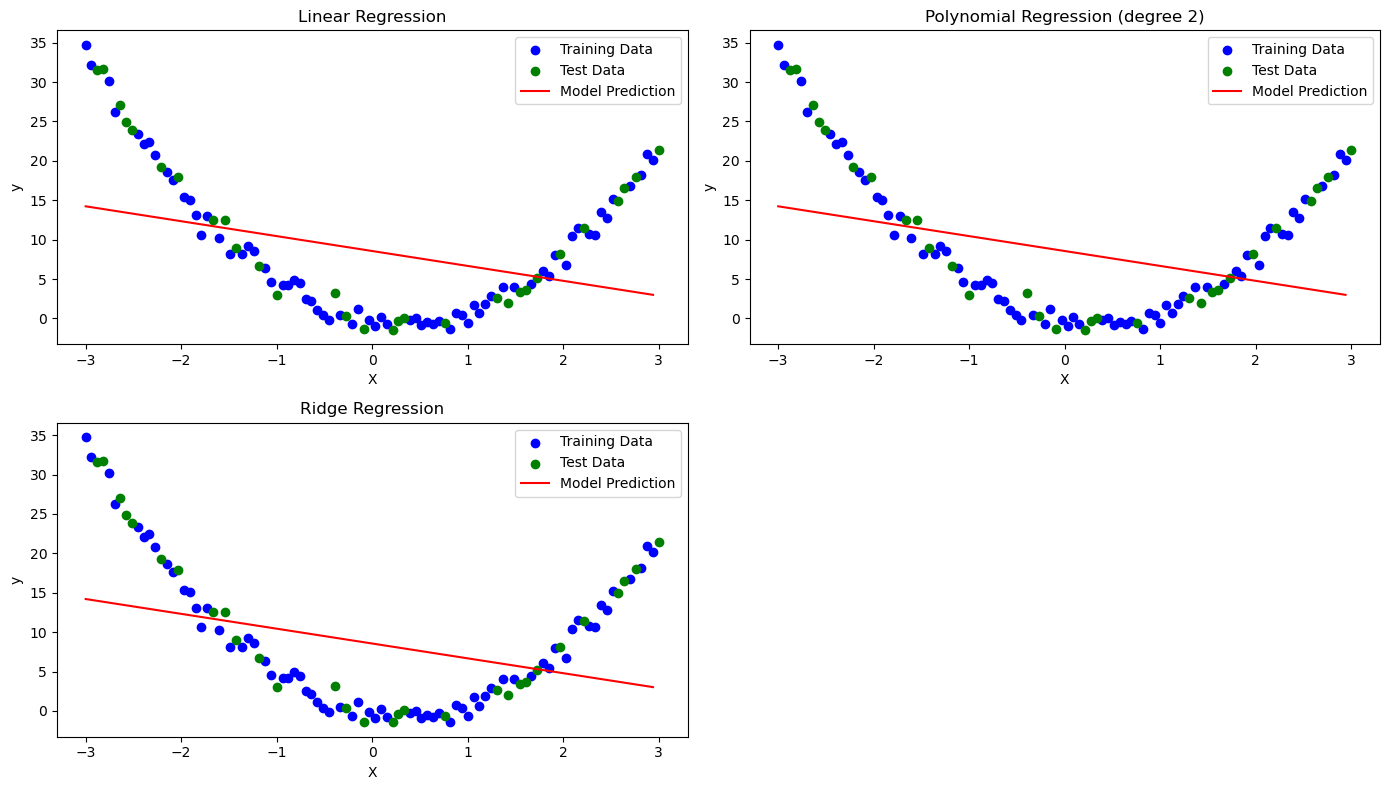

In [5]:
# Different Regression Models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Function to generate synthetic datasets
def generate_data(seed=0):
    np.random.seed(seed)
    X = np.linspace(-3, 3, 100).reshape(-1, 1)
    y = 3 * X.flatten()**2 - 2 * X.flatten() + np.random.normal(0, 1, 100)
    return X, y

# Function to fit and predict with different models
def fit_and_predict(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Function to plot results
def plot_results(X_train, y_train, X_test, y_test, models, titles):
    plt.figure(figsize=(14, 8))
    for i, (model, title) in enumerate(zip(models, titles)):
        plt.subplot(2, 2, i + 1)
        X_range = np.linspace(min(X_train), max(X_train), 300).reshape(-1, 1)
        y_range = fit_and_predict(X_train, y_train, X_range, model)
        
        plt.scatter(X_train, y_train, color='blue', label='Training Data')
        plt.scatter(X_test, y_test, color='green', label='Test Data')
        plt.plot(X_range, y_range, color='red', label='Model Prediction')
        plt.title(title)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Generate synthetic datasets
X, y = generate_data(seed=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression Model
linear_model = LinearRegression()

# Polynomial Regression Model (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()

# Ridge Regression Model (with regularization)
ridge_model = Ridge(alpha=1.0)

# Fit and predict with each model
y_pred_linear = fit_and_predict(X_train, y_train, X_test, linear_model)
y_pred_poly = fit_and_predict(X_poly_train, y_train, X_poly_test, poly_model)
y_pred_ridge = fit_and_predict(X_train, y_train, X_test, ridge_model)

# Plotting results
models = [linear_model, poly_model, ridge_model]
titles = ['Linear Regression', 'Polynomial Regression (degree 2)', 'Ridge Regression']

plot_results(X_train, y_train, X_test, y_test, models, titles)


## Follow the steps
### Matrix Transpose: 
transpose(matrix) swaps rows and columns.
### Matrix Multiplication: 
matrix_multiply(A, B) computes the dot product.
### Matrix Inversion: 
inverse(matrix) uses Gauss-Jordan elimination to find the inverse.
### Linear Regression: 
Fit using the normal equation $$β = (X^T X)^{-1} X^T y$$

### Polynomial Regression: 
Add polynomial features and fit using linear regression.
### Ridge Regression: 
Includes regularization by modifying the normal equation to $$(X^T X + λI)^{-1} X^T y$$.
Plotting: Visualize the results of each regression model on the same plot.

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


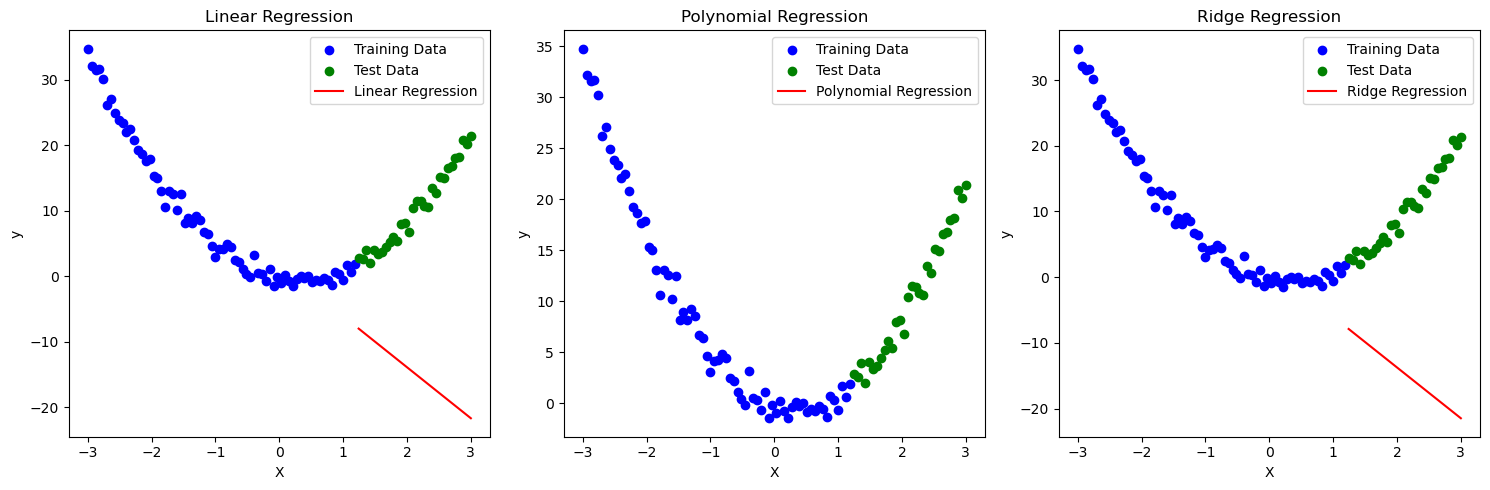

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Helper Functions
def transpose(matrix):
    """Transpose of a matrix."""
    return np.array(matrix).T

def matrix_multiply(A, B):
    """Matrix multiplication."""
    return np.dot(A, B)

def inverse(matrix):
    """Matrix inversion using Gauss-Jordan elimination."""
    A = np.array(matrix, float)
    n = A.shape[0]
    A_inv = np.eye(n)
    for i in range(n):
        # Make the diagonal contain all 1s
        diag = A[i, i]
        A[i] = A[i] / diag
        A_inv[i] = A_inv[i] / diag
        for j in range(n):
            if i != j:
                ratio = A[j, i]
                A[j] -= ratio * A[i]
                A_inv[j] -= ratio * A_inv[i]
    return A_inv

def fit_linear_regression(X, y):
    """Fit Linear Regression model."""
    X_T = transpose(X)
    X_T_X = matrix_multiply(X_T, X)
    X_T_X_inv = inverse(X_T_X)
    X_T_y = matrix_multiply(X_T, y)
    beta = matrix_multiply(X_T_X_inv, X_T_y)
    return beta

def predict(X, beta):
    """Make predictions."""
    return matrix_multiply(X, beta)

def add_polynomial_features(X, degree):
    """Add polynomial features up to a given degree."""
    X_poly = np.hstack([X**d for d in range(degree + 1)])
    return X_poly

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 3 * X.flatten()**2 - 2 * X.flatten() + np.random.normal(0, 1, 100)

# Split data into training and test sets
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Add intercept term (column of ones)
X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Fit Linear Regression
beta_linear = fit_linear_regression(X_train_with_intercept, y_train)

# Predict using Linear Regression
y_pred_linear = predict(X_test_with_intercept, beta_linear)

# Fit Polynomial Regression (degree 2)
X_poly_train = add_polynomial_features(X_train, degree=2)
X_poly_test = add_polynomial_features(X_test, degree=2)
X_poly_train_with_intercept = np.hstack([np.ones((X_poly_train.shape[0], 1)), X_poly_train])
X_poly_test_with_intercept = np.hstack([np.ones((X_poly_test.shape[0], 1)), X_poly_test])

beta_poly = fit_linear_regression(X_poly_train_with_intercept, y_train)
y_pred_poly = predict(X_poly_test_with_intercept, beta_poly)

# Ridge Regression (λ = 1.0)
lambda_ = 1.0
X_train_with_intercept_ridge = X_train_with_intercept
X_T_X_ridge = matrix_multiply(transpose(X_train_with_intercept_ridge), X_train_with_intercept_ridge)
X_T_X_ridge += lambda_ * np.eye(X_T_X_ridge.shape[0])
X_T_X_ridge_inv = inverse(X_T_X_ridge)
X_T_y_ridge = matrix_multiply(transpose(X_train_with_intercept_ridge), y_train)
beta_ridge = matrix_multiply(X_T_X_ridge_inv, X_T_y_ridge)

# Predict using Ridge Regression
y_pred_ridge = predict(X_test_with_intercept, beta_ridge)

# Plotting results
def plot_results(X_train, y_train, X_test, y_test, y_pred_linear, y_pred_poly, y_pred_ridge):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_pred_poly, color='red', label='Polynomial Regression')
    plt.title('Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_pred_ridge, color='red', label='Ridge Regression')
    plt.title('Ridge Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(X_train, y_train, X_test, y_test, y_pred_linear, y_pred_poly, y_pred_ridge)
